In [58]:
"""
The main wrapper class for the Keras model.
Responsible for loading the model, predicting moves, and evaluating positions.
"""
import os
from typing import List

import numpy as np
import pandas as pd
import chess
from tqdm import tqdm 
from chess import Board, Move
from tensorflow.keras.models import load_model


os.chdir('/home/mati/projekty/searchless_chess')
from src.data_processing import fen_to_tensor


In [51]:
def find_best_move(board, model):
    generator_of_legal_moves = board.generate_legal_moves()
    legal_moves = [move for move in generator_of_legal_moves]
    legal_fens = get_list_of_fens_after_legal_move(board, legal_moves)
    tensors = np.array([fen_to_tensor(fen, always_white_perspective=True) for fen in legal_fens])
    evaluations = model.predict(tensors)
    best_move_id = np.argmin(evaluations)
    best_move = legal_moves[best_move_id]
    return best_move

In [60]:
def test_puzzle_detailed(puzzle, model):
    """Zwraca szczegółowe informacje o wykonaniu puzzle."""
    board = chess.Board(puzzle.fen)
    moves = puzzle.moves

    our_moves_count = len([m for i, m in enumerate(moves) if i % 2 == 1])
    correct_moves = 0

    for i, expected_move_uci in enumerate(moves):
        if i % 2 == 0:
            move = chess.Move.from_uci(expected_move_uci)
            board.push(move)
        else:
            predicted_move = find_best_move(board, model)

            if predicted_move and predicted_move.uci() == expected_move_uci:
                correct_moves += 1
                board.push(predicted_move)
            else:
                # Przerwij po pierwszym błędzie
                break

    return {
        'success': correct_moves == our_moves_count,
        'correct_moves': correct_moves,
        'total_moves': our_moves_count,
        'moves': moves
    }

In [54]:
df = pd.read_csv('data/puzzles/lichess_db_puzzle.csv', nrows=100)
df.columns = df.columns.str.lower()
df = df[['fen', 'moves', 'rating']]
df['moves'] = df['moves'].str.split(' ')

In [55]:
model = load_model('models/backup_step_02.keras')

/home/mati/.cache/pypoetry/virtualenvs/searchless-chess-Ltt7CI8q-py3.11/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 26 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [61]:
detailed_results = []
for i, puzzle in tqdm(df.iterrows(), total=df.shape[0]):
    result = test_puzzle_detailed(puzzle, model)
    detailed_results.append(result)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step  


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step 


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step  


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step  


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 366ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 413ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step  


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 340ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 319ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step 


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


100%|██████████| 100/100 [02:29<00:00,  1.50s/it]


In [63]:
full_success = sum(1 for r in detailed_results if r['success'])
partial_success = sum(1 for r in detailed_results if r['correct_moves'] > 0 and not r['success'])

print(f"Pełne puzzle rozwiązane: {full_success}")
print(f"Częściowo rozwiązane: {partial_success}")
print(f"Całkowicie failed: {len(detailed_results) - full_success - partial_success}")

results = [res['success'] for res in detailed_results]

df['res'] = results

df.res.mean() # 0.557 ==> 0.672 (resnet)

df['rating_cut'] = pd.cut(df.rating, [0, 1000, 1500, 2000, 2500, 3000, 10000])

Pełne puzzle rozwiązane: 32
Częściowo rozwiązane: 15
Całkowicie failed: 53


In [2]:
class ChessAI:
    def __init__(self, model_path: str):
        self.model_path = model_path
        self.model = load_model(model_path)

    def predict_move(self, board: Board) -> Move:
        generator_of_legal_moves = board.generate_legal_moves()
        legal_moves = [move for move in generator_of_legal_moves]
        list_of_fens = get_list_of_fens_after_legal_move(board, legal_moves)
        list_of_tensors = np.array([fen_to_tensor(fen, always_white_perspective=True) for fen in list_of_fens])
        evaluations = self.model.predict(list_of_tensors)


        # 5. Ocenia wszystkie legalne ruchy
        # 6. Wybiera najlepszy ruch.
        # 7. Zwraca najlepszy ruch.
        pass

    def get_list_of_fens_after_legal_move(self, board: Board, legal_moves: List[Move]) -> List[str]:
        list_of_fens = []
        for move in legal_moves:
            board.push(move)
            list_of_fens.append(board.fen())
            board.pop()
        return list_of_fens

    def evaluate_position(self, fen: str) -> float:
        pass

In [3]:
def get_list_of_fens_after_legal_move(board: Board, legal_moves: List[Move]) -> List[str]:
    list_of_fens = []
    for move in legal_moves:
        board.push(move)
        list_of_fens.append(board.fen())
        board.pop()
    return list_of_fens

2025-11-25 21:42:35.264636: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/mati/.cache/pypoetry/virtualenvs/searchless-chess-Ltt7CI8q-py3.11/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 122 variables whereas the saved optimizer has 126 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [5]:
board = Board()
board.push(Move.from_uci('e2e4'))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step  


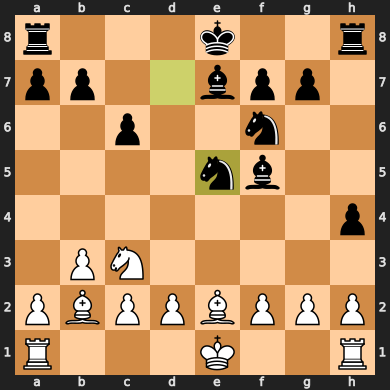

In [32]:
generator_of_legal_moves = board.generate_legal_moves()
legal_moves = [move for move in generator_of_legal_moves]
legal_fens = get_list_of_fens_after_legal_move(board, legal_moves)
tensors = np.array([fen_to_tensor(fen, always_white_perspective=True) for fen in legal_fens])
evaluations = model.predict(tensors)
min_best_move_id = np.argmin(evaluations)
min_best_move = legal_moves[min_best_move_id]

max_best_move_id = np.argmax(evaluations)
max_best_move = legal_moves[max_best_move_id]
board.push(min_best_move)
display(board)
# board.pop()

In [324]:
from datasets import load_dataset

/home/mati/.cache/pypoetry/virtualenvs/searchless-chess-Ltt7CI8q-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [328]:
url = 'mateuszgrzyb/lichess-stockfish-normalized'
file = 'train-00005.parquet'

In [329]:
ds = load_dataset(
    url,
    split="train",
    streaming=True,
    data_files=file,
)

In [336]:
df_hf = ds.iter(batch_size=1_00)

In [339]:
import pandas as pd

In [340]:
df = pd.read_parquet('/home/mati/projekty/searchless_chess/data/stage_3_split/train-00007.parquet')

In [342]:
df = df.sample(100)

In [349]:
df['cp_abs'] = df.cp.abs()

In [353]:
df = df.dropna(subset='cp')

In [596]:
df.sort_values('cp_abs', ascending=False).head(5)[['fen', 'depth', 'cp']].reset_index(drop=True).to_markdown()

'|    | fen                                               |   depth |    cp |\n|---:|:--------------------------------------------------|--------:|------:|\n|  0 | 8/8/8/3K4/6Q1/5r2/4k3/8 b - -                     |      25 |  9605 |\n|  1 | 4k3/p4RpN/1p6/4p3/2P1p3/4P3/PP3PPP/R5K1 b - -     |      25 |  1258 |\n|  2 | 1r5k/6pp/2pr4/P1Q4q/1P2B3/2P5/3bnPPP/R3NR1K w - - |      20 |  1148 |\n|  3 | 8/1p6/p1p5/4p3/P1P2p2/1B3Pp1/3k2K1/8 b - -        |      22 | -1123 |\n|  4 | 2n5/1k6/8/PP1K1p1p/5P1P/6P1/8/8 b - -             |      26 |   870 |'

In [358]:
df.sort_values('cp_abs', ascending=False).head(10)

,fen,depth,cp,mate,cp_abs
778818,8/8/8/3K4/6Q1/5r2/4k3/8 b - -,25,9605.0,NaN,9605.0
559812,4k3/p4RpN/1p6/4p3/2P1p3/4P3/PP3PPP/R5K1 b - -,25,1258.0,NaN,1258.0
419499,1r5k/6pp/2pr4/P1Q4q/1P2B3/2P5/3bnPPP/R3NR1K w - -,20,1148.0,NaN,1148.0
681427,8/1p6/p1p5/4p3/P1P2p2/1B3Pp1/3k2K1/8 b - -,22,-1123.0,NaN,1123.0
467692,2n5/1k6/8/PP1K1p1p/5P1P/6P1/8/8 b - -,26,870.0,NaN,870.0
324268,rn3rk1/pb3ppp/3b4/qP6/N1ppn2B/4P3/PP1N1PPP/R2Q...,21,-827.0,NaN,827.0
386455,1k1R4/1p4p1/P4p1p/8/2PN2P1/7P/1r3PK1/8 b - -,17,700.0,NaN,700.0
236635,r4nk1/1p3p1p/1p4p1/6B1/6b1/2b2N2/nPP1BPPP/1K1R...,19,675.0,NaN,675.0
24339,b1r3qk/p7/1pn5/7Q/8/P7/1P3PPP/R3R1K1 b - -,24,642.0,NaN,642.0
515444,3k3r/p2b1Qpp/5n2/4p1N1/5B2/P4P2/Pq3KPP/R6R w - -,20,-633.0,NaN,633.0


In [347]:
df.loc[324268, 'fen']

'rn3rk1/pb3ppp/3b4/qP6/N1ppn2B/4P3/PP1N1PPP/R2QKB1R w KQ -'

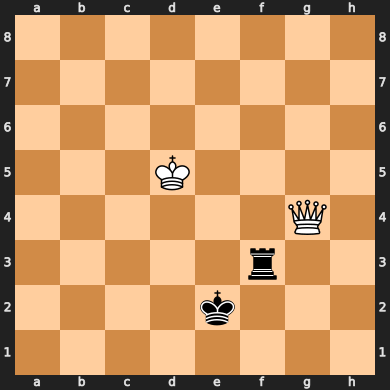

In [364]:
board = Board('8/8/8/3K4/6Q1/5r2/4k3/8 b - -')
display(board)

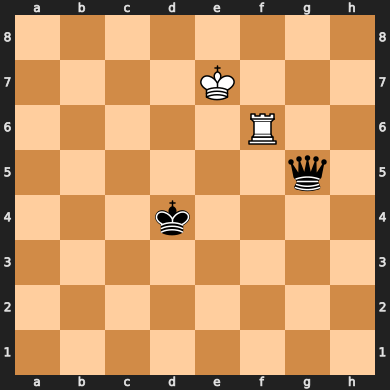

In [365]:
display(board.mirror())